In [1]:
#importando a biblioteca
import pandas as pd

In [2]:
#Leitura dos arquivos
df1 = pd.read_excel("/content/Aracaju.xlsx")
df2 = pd.read_excel("/content/Fortaleza.xlsx")
df3 = pd.read_excel("/content/Natal.xlsx")
df4 = pd.read_excel("/content/Recife.xlsx")
df5 = pd.read_excel("/content/Salvador.xlsx")

In [3]:
#juntando todos os arquivos
df = pd.concat([df1, df2, df3, df4, df5])

In [4]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [5]:
#exibindo as ultimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [6]:
df.dtypes #tipos de dados de cada coluna

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [7]:
#alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [8]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [10]:
#TRATADO VALORES FALTANTES

In [11]:
#cONSULTANDO LINHAS COM VALORES FALTANTES
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [12]:
#Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [13]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [14]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde
46,Salvador,2019-01-01,34.84,1034,3
16,Salvador,2019-01-01,32.47,1036,2
114,Natal,2019-01-02,25.52,1034,1
63,Fortaleza,2019-01-01,118.17,1004,1
77,Natal,2019-04-01,426.00,853,3
118,Salvador,2019-03-02,92.21,1035,2
98,Recife,2019-01-01,137.34,981,8
82,Salvador,2019-01-01,207.88,1035,1
67,Natal,2019-02-14,379.00,852,2
31,Salvador,2019-01-01,202.25,1035,2


In [18]:
df["Vendas"].fillna(0, inplace=True)

In [19]:
#apagando as linhas com valores nulos
df.dropna(inplace=True)

In [20]:
#apagando valores nulos com base em apenas uma coluna
df.dropna(subset=["Vendas"], inplace=True)

In [22]:
#agora em todas as colunas
df.dropna(how="all", inplace=True)

In [25]:
####Criando uma colun#### E Calculando vendas * qtde
df["Receita"] = df["Vendas"].mul(df["Qtde"])


In [26]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [30]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [31]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [32]:
#Retornar a maior venda
df["Receita"].max()

3544.0

In [33]:
df["Receita"].min()

3.34

In [34]:
#nlargest -> melhor receita
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [35]:
#nsamllest -> pior receita
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [36]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [37]:
#Ordenamento o conjunto de dados pela Receita
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


**TRABALHANDO COM DATAS**


In [38]:
#TRANSFORMANDO A COLUNA DE DATA EM TIPO INTEIRO
df["Data"] = df["Data"].astype("int64")

In [39]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [40]:
df["Data"] = pd.to_datetime(df["Data"])

In [41]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [42]:
#agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [43]:
#Criando uma coluna com Ano
df["Ano_Venda"] = df["Data"].dt.year

In [44]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
86,Recife,2019-01-01,17.83,982,8,142.64,8.0,2019
193,Natal,2019-01-02,3.97,1036,2,7.94,2.0,2019
57,Aracaju,2018-01-01,23.49,1520,7,164.43,7.0,2018
175,Natal,2019-01-02,16.53,1036,2,33.06,2.0,2019
221,Natal,2019-01-02,142.23,1035,2,284.46,2.0,2019


In [45]:
#Extrainso o mês e o dia
df["mes_venda"], df["Dia_venda"] = (df["Data"].dt.month,df["Data"].dt.day)

In [46]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,Dia_venda
116,Fortaleza,2019-03-02,79.10,982,2,158.20,2.0,2019,3,2
31,Salvador,2019-01-01,202.25,1035,2,404.50,2.0,2019,1,1
120,Salvador,2019-03-02,140.17,1036,2,280.34,2.0,2019,3,2
26,Aracaju,2018-01-01,6.98,1521,10,69.80,10.0,2018,1,1
13,Fortaleza,2019-02-12,118.58,1003,4,474.32,4.0,2019,2,12


In [47]:
#data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [49]:
#Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [50]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,Dia_venda,diferenca_dias
47,Salvador,2019-01-01,190.03,1036,2,380.06,2.0,2019,1,1,365 days
10,Salvador,2019-01-01,30.97,1036,1,30.97,1.0,2019,1,1,365 days
158,Natal,2019-01-02,183.64,1037,3,550.92,3.0,2019,1,2,366 days
30,Salvador,2019-01-01,47.96,1034,2,95.92,2.0,2019,1,1,365 days
227,Natal,2019-01-02,14.70,1035,1,14.70,1.0,2019,1,2,366 days


In [51]:
#criando uma coluna de trimestre
df["semestre_venda"] = df["Data"].dt.quarter

In [52]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,Dia_venda,diferenca_dias,semestre_venda
137,Natal,2019-01-02,51.66,1036,3,154.98,3.0,2019,1,2,366 days,1
58,Fortaleza,2019-01-01,38.90,1004,4,155.60,4.0,2019,1,1,365 days,1
19,Aracaju,2018-01-01,43.96,1520,9,395.64,9.0,2018,1,1,0 days,1
93,Recife,2019-01-01,17.45,980,6,104.70,6.0,2019,1,1,365 days,1
13,Aracaju,2018-01-01,43.45,1522,10,434.50,10.0,2018,1,1,0 days,1


In [55]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [56]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,Dia_venda,diferenca_dias,semestre_venda
17,Natal,2018-02-18,276.00,854,3,828.00,3.0,2018,2,18,48 days,1
12,Aracaju,2019-01-01,9.78,1520,8,78.24,8.0,2019,1,1,365 days,1
89,Recife,2019-01-01,18.11,980,3,54.33,3.0,2019,1,1,365 days,1
104,Natal,2019-01-02,188.79,1036,3,566.37,3.0,2019,1,2,366 days,1
52,Natal,2018-04-27,778.00,854,4,3112.00,4.0,2018,4,27,116 days,2


**VISUALIZAÇÃO DE DADOS**


In [57]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

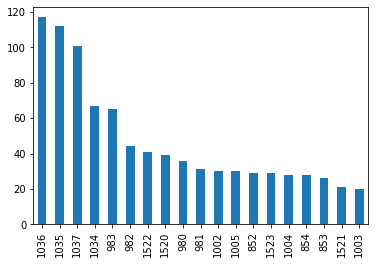

In [58]:
#gráficos de barras -matplotlib
df["LojaID"].value_counts(ascending=False).plot.bar()


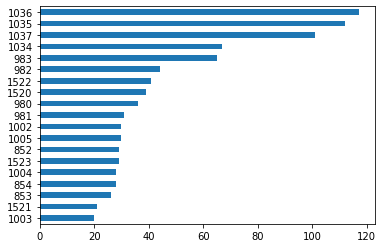

In [61]:
df["LojaID"].value_counts(ascending=True).plot.barh();

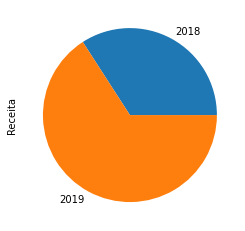

In [63]:
#Gráfico de 
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [64]:
#total de vendas por cidade
df["Cidade"].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

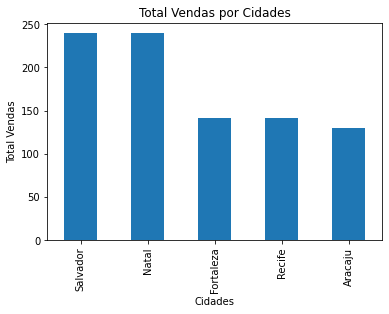

In [65]:
#adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total Vendas por Cidades")
plt.xlabel("Cidades")
plt.ylabel("Total Vendas");

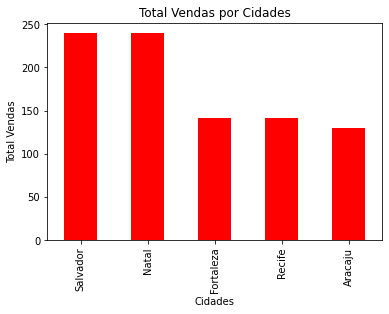

In [68]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total Vendas por Cidades", color="red")
plt.xlabel("Cidades")
plt.ylabel("Total Vendas");

In [69]:
#alterar o estilo
plt.style.use("ggplot")

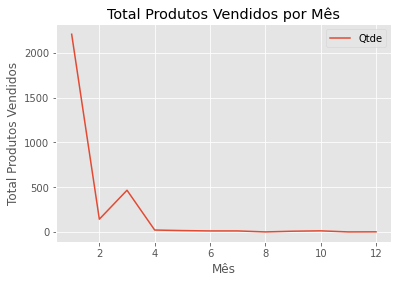

In [72]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total Produtos Vendidos por Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()


In [73]:
#vendas por mês
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [74]:
#selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

In [75]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,Dia_venda,diferenca_dias,semestre_venda
99,Recife,2019-01-01,136.72,980,4,546.88,4.0,2019,1,1,365 days,1
93,Natal,2019-01-02,15.58,1037,1,15.58,1.0,2019,1,2,366 days,1
234,Natal,2019-01-03,48.39,1035,2,96.78,2.0,2019,1,3,367 days,1
110,Recife,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
12,Natal,2019-02-02,709.00,853,3,2127.00,3.0,2019,2,2,397 days,1
228,Natal,2019-01-02,6.87,1037,3,20.61,3.0,2019,1,2,366 days,1
5,Natal,2019-03-30,674.00,854,2,1348.00,2.0,2019,3,30,453 days,1
197,Natal,2019-01-02,10.45,1036,2,20.90,2.0,2019,1,2,366 days,1
62,Recife,2019-01-01,23.04,983,6,138.24,6.0,2019,1,1,365 days,1
103,Recife,2019-01-01,41.65,982,3,124.95,3.0,2019,1,1,365 days,1


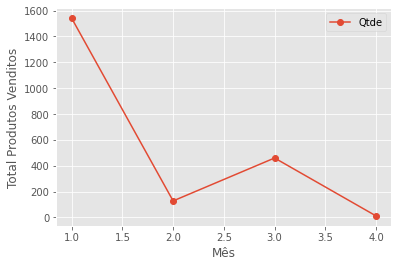

In [78]:
#total produtos vendidos por mes
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Venditos");
plt.legend();

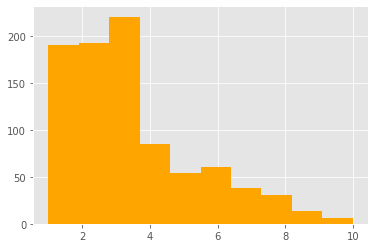

In [81]:
#com histograma
plt.hist(df["Qtde"], color="orange");

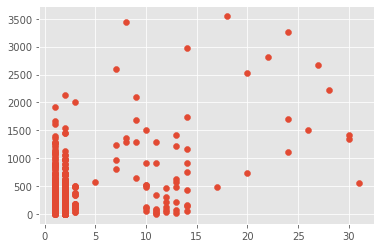

In [83]:
#gráfico de espeção
plt.scatter(x=df_2019["Dia_venda"], y = df_2019["Receita"]);

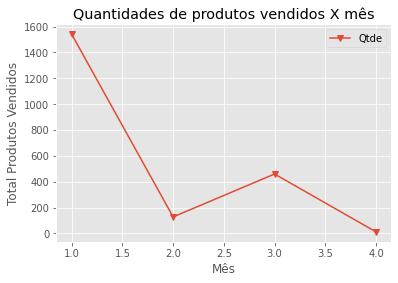

In [85]:
#salvando as imagens - gráficos
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidades de produtos vendidos X mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("gráfico Qtde x MES.png")
